# Parking Space Counter using OpenCV 

In [14]:
!pip install opencv-python cvzone matplotlib

In [15]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [16]:
# Load positions
with open('CarParkPos', 'rb') as f:
    posList = pickle.load(f)

width, height = 107, 48



In [17]:
# Open video
cap = cv2.VideoCapture('carPark.mp4')

def checkParkingSpace(imgPro, img):
    spaceCounter = 0
    for pos in posList:
        x, y = pos
        imgCrop = imgPro[y:y + height, x:x + width]
        count = cv2.countNonZero(imgCrop)

        if count < 900:
            color = (0, 255, 0)
            thickness = 5
            spaceCounter += 1
        else:
            color = (0, 0, 255)
            thickness = 2

        cv2.rectangle(img, pos, (pos[0] + width, pos[1] + height), color, thickness)
        cv2.putText(img, str(count), (x, y + height - 3), cv2.FONT_HERSHEY_PLAIN, 1.2, color, 2)

    cv2.putText(img, f'Free: {spaceCounter}/{len(posList)}', (100, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5)
    return img

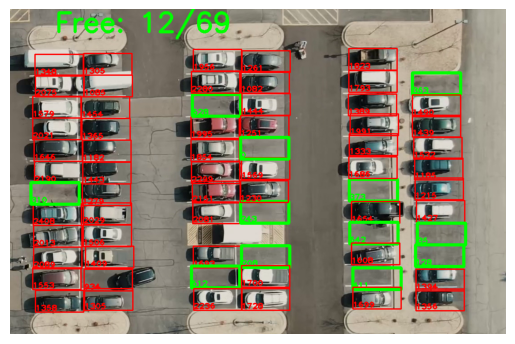

In [18]:
# Display video frames in Jupyter
frame_count = 0
while True:
    ret, img = cap.read()
    if not ret:
        break  # Video ended

    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 1)
    imgThres = cv2.adaptiveThreshold(imgBlur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY_INV, 25, 16)
    imgMedian = cv2.medianBlur(imgThres, 5)
    kernel = np.ones((3, 3), np.uint8)
    imgDilate = cv2.dilate(imgMedian, kernel, iterations=1)

    output_img = checkParkingSpace(imgDilate, img)
    # Convert BGR to RGB for matplotlib
    output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    # Display frame
    clear_output(wait=True)
    plt.imshow(output_img_rgb)
    plt.axis('off')
    plt.show()

    frame_count += 1
    if frame_count > 100:  # Display only first 100 frames
        break

cap.release()